In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('wind.csv',encoding='GB2312')

去除df中的异常值①：Wind Speed＞5而Theoretical Power或Active Power≤0

去除df中的异常值②：|Theoretical Power-Active Power|＞500

In [2]:
df = df[~((df['WindSpeed'] > 5) & ((df['ActivePower'] <= 0) | (df['TheoreticalPower'] <= 0)))]
df = df[abs(df['ActivePower'] - df['TheoreticalPower']) <= 500]
df.head()

,ActivePower,WindSpeed,TheoreticalPower,WindDirection
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


绘制Active Power关于Wind Speed、Wind Direction、Theoretical Power的散点图，并按左右顺序将其拼接为一张图。

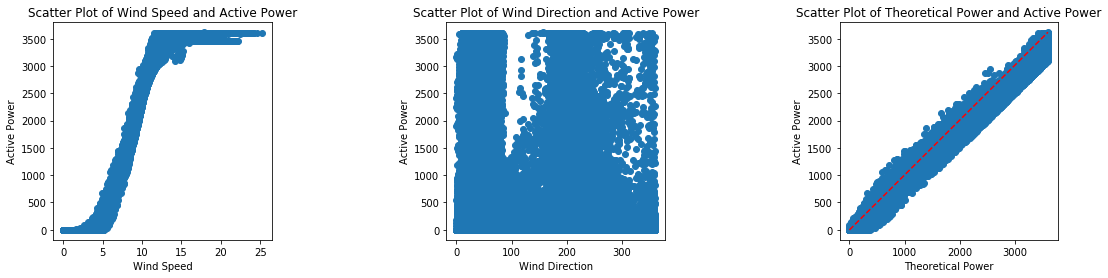

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = df.iloc[:,[1]].values
x2 = df.iloc[:,[3]].values
x3 = df.iloc[:,[2]].values
y = df.iloc[:,[0]].values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

ax1.scatter(x1, y)
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Active Power')
ax1.set_title('Scatter Plot of Wind Speed and Active Power')

ax2.scatter(x2, y)
ax2.set_xlabel('Wind Direction')
ax2.set_ylabel('Active Power')
ax2.set_title('Scatter Plot of Wind Direction and Active Power')

ax3.scatter(x3, y)
ax3.plot([np.min(x3), np.max(x3)], [np.min(y), np.max(y)], color='red', linestyle='--')
ax3.set_xlabel('Theoretical Power')
ax3.set_ylabel('Active Power')
ax3.set_title('Scatter Plot of Theoretical Power and Active Power')

plt.subplots_adjust(wspace=0.8)
plt.show()

使用Seaborn绘制Active Power、Theoretical Power的箱线图，并使用不同颜色标记。

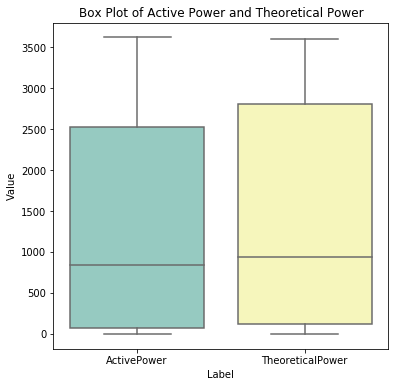

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df.iloc[:,[0, 2]]
df1 = df1.melt()  
plt.figure(figsize=(6, 6))
sns.boxplot(x='variable', y='value', data=df1, palette='Set3')
plt.title('Box Plot of Active Power and Theoretical Power')
plt.xlabel('Label')
plt.ylabel('Value')
plt.show()

绘制(Wind Speed,Wind Direction,Active Power)的三维散点图

G:\anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No handles with labels found to put in legend.


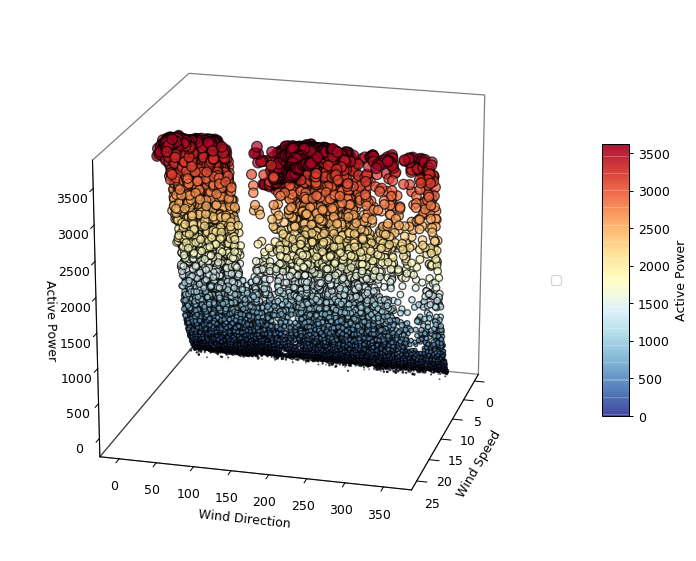

In [5]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8), dpi=90)
ax = fig.gca(projection='3d')
ax.view_init(azim=15, elev=20)
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4

p = ax.scatter3D(df.WindSpeed, df.WindDirection, df.ActivePower, c=df.ActivePower, s=df.ActivePower*0.02, cmap='RdYlBu_r', edgecolor='k', alpha=0.7)
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Wind Direction')
ax.set_zlabel('Active Power')
ax.legend(loc='center right')
cbar = fig.colorbar(p, shrink=0.5, aspect=10)
cbar.set_label('Active Power')
plt.show()

绘制四个变量的相关系数图

In [6]:
mat_corr=np.round(df.corr(),1).reset_index()
mydata=pd.melt(mat_corr,id_vars='index',var_name='var',value_name='value')
mydata['AbsValue']=np.abs(mydata.value)
mydata.head()

,index,var,value,AbsValue
0,ActivePower,ActivePower,1.0,1.0
1,WindSpeed,ActivePower,0.9,0.9
2,TheoreticalPower,ActivePower,1.0,1.0
3,WindDirection,ActivePower,-0.1,0.1
4,ActivePower,WindSpeed,0.9,0.9


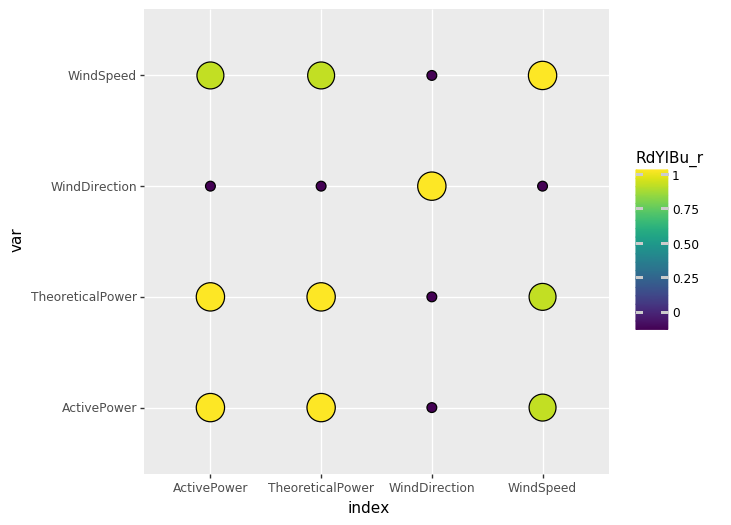

<ggplot: (-9223371840343739424)>

In [7]:
from plotnine import *
(
    ggplot(mydata, aes(x ='index', y ='var', fill = 'value',size='AbsValue')) +  
    geom_point(shape='o',color="black") +
    scale_size_area(max_size=11, guide=False) +
    scale_fill_cmap(name ='RdYlBu_r')+
    coord_equal()+
    theme(dpi=100,figure_size=(6,6))
)

对Active Power关于Wind Speed，Wind Direction做多项式曲面拟合，计算拟合的MSE，并绘制测试集部分拟合值(蓝)与实际值(红)的图像

In [8]:
from sklearn import preprocessing
subdf = df[:43800]
values = subdf.values
x, y = values[:, [1, 2]], values[:, [0]]
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)
normalized_df = pd.DataFrame({'ActivePower': y.flatten(), 'WindSpeed': x[:, 0], 'WindDirection': x[:, 1]})

                            OLS Regression Results                            
Dep. Variable:            ActivePower   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.798e+06
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:51:08   Log-Likelihood:                 94059.
No. Observations:               43800   AIC:                        -1.881e+05
Df Residuals:                   43795   BIC:                        -1.881e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

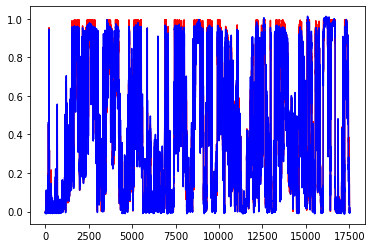

In [9]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

##多项式拟合z=f(x, y)=a+bx+cy+dx2+ey2
formula = 'ActivePower~WindSpeed+np.square(WindSpeed)+WindDirection+np.square(WindDirection)'
est = ols(formula,data=normalized_df).fit()
print(est.summary())
predicted_values = est.predict(normalized_df)
actual_values = normalized_df['ActivePower'] 

y1 = np.array(actual_values[26280:43800]).flatten().tolist()
y2 = np.array(predicted_values[26280:43800]).flatten().tolist()
criterion = nn.MSELoss()
predicted = torch.tensor(y2)
target = torch.tensor(y1)
loss = criterion(predicted, target)
print("MSE Loss:", loss.item())
num = list(range(17520))
plt.plot(num, y1, 'r-')
plt.plot(num, y2, 'b-')
plt.draw()
plt.pause(0.02)
plt.ioff()
plt.show()

In [10]:
def split_data(subdf, n_train, n_test):
    values = subdf.values
    train = values[:n_train,[0,1,3]]
    test = values[n_train:,[0,1,3]]
    x_train, y_train = train[:,[1,2]],train[:,[0]]
    x_test, y_test = test[:,[1,2]],test[:,[0]]
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

    x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_train = x_scaler.fit_transform(x_train)
    y_train = y_scaler.fit_transform(y_train)
    x_test = x_scaler.transform(x_test)
    y_test = y_scaler.transform(y_test)
    
    return x_train, y_train, x_test, y_test

对Active Power关于Wind Speed，Wind Direction建立SVM模型，计算MSE Loss，并绘制测试集拟合值(蓝)与实际值(红)的图像

In [11]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import preprocessing
import torch
import torch.nn as nn
from sklearn.model_selection import ParameterGrid
np.random.seed(2024)

n_train = 26280
n_test = 17520
subdf = df[:43800]
x_train, y_train, x_test, y_test = split_data(subdf, n_train = n_train, n_test = n_test)

In [12]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1],
    'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1]
}
grid = ParameterGrid(param_grid)

In [ ]:
best_params = None
best_loss = 1
for params in grid: 
    svm = SVR(kernel=params['kernel'], C=params['C'], gamma=params['gamma'], epsilon=params['epsilon'])
    svm.fit(x_train, y_train)
    prediction = svm.predict(x_test)

    criterion = nn.MSELoss()
    predicted = torch.tensor(prediction)
    target = torch.tensor(y_test)
    loss = criterion(predicted, target)
    if loss < best_loss:
        best_loss = loss
        best_params = params    
    print("Parameters:", params)
    print("Loss:", loss)
    print("-----------------------------------")
    
print("Best Parameters:", best_params)
print("Best Validation Loss:", best_loss)

In [13]:
best_params = {'C': 0.1, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([17520, 1])) that is different to the input size (torch.Size([17520])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


MSE Loss: 0.16448868249246318


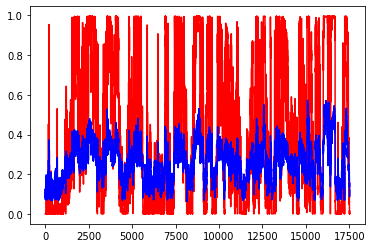

In [14]:
best_svm = SVR(**best_params)
best_svm.fit(x_train, y_train)
prediction = best_svm.predict(x_test)

criterion = nn.MSELoss()
predicted = torch.tensor(prediction)
target = torch.tensor(y_test)
y1 = np.array(y_test).flatten().tolist()
y2 = predicted.data.numpy().flatten()
loss = criterion(predicted, target)
print("MSE Loss:", loss.item())
num = list(range(17520))
plt.plot(num, y1, 'r-')
plt.plot(num, y2, 'b-')
plt.draw()
plt.pause(0.02)
plt.ioff()
plt.show()

对Active Power关于Wind Speed，Wind Direction建立RNN模型，计算MSE Loss，并绘制测试集拟合值(蓝)与实际值(红)的图像

In [15]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F
import torchvision
from torchvision import datasets,transforms
from torch import optim
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
import math, random
from pandas import read_csv
from sklearn import preprocessing
import torch.backends.cudnn as cudnn
from sklearn.model_selection import ParameterGrid

cudnn.deterministic = True
torch.manual_seed(2024)

n_train = 26280
n_test = 17520
subdf = df[:43800]
x_train, y_train, x_test, y_test = split_data(subdf, n_train = n_train, n_test = n_test)

In [17]:
INPUT_SIZE = 2 
print("输入特征维度为："+str(INPUT_SIZE))

TIME_STEP = int(input("请输入时序步长数："))
if n_train % TIME_STEP == 0 and n_test % TIME_STEP == 0:
    time_train = int(n_train/TIME_STEP)
    time_test = int(n_test/TIME_STEP)
else:
    raise Exception("Invalid input. Please try again.")
    
H_SIZE = int(input("请输入隐藏单元个数(8的倍数)："))
if H_SIZE % 8 != 0:
    raise Exception("Invalid input. Please try again.")
# L_SIZE = int(input("请输入层数：")) 
# EPOCHS = int(input("请输入总共训练次数："))
BATCH_SIZE = 12
LR= float(input("请输入学习率："))

输入特征维度为：2
请输入时序步长数：120
请输入隐藏单元个数(8的倍数)：8
请输入学习率：0.02


In [18]:
x_train = torch.tensor(x_train)
x_train = x_train.reshape(time_train, TIME_STEP, INPUT_SIZE)
y_train = torch.tensor(y_train)
y_train = y_train.reshape(time_train, TIME_STEP, 1)
x_test = torch.tensor(x_test)
x_test = x_test.reshape(time_test, TIME_STEP, INPUT_SIZE)
y_test = torch.tensor(y_test)
y_test = y_test.reshape(time_test, TIME_STEP, 1)

In [19]:
H_SIZEs = [int(H_SIZE/8), int(H_SIZE/4), int(H_SIZE/2), int(H_SIZE), int(H_SIZE*2), int(H_SIZE*4), int(H_SIZE*8)]
L_SIZEs = [1, 2, 3, 4, 5]
EPOCHs = [40, 80, 120]
LRs = [LR/8, LR/4, LR/2, LR, LR*2, LR*4, LR*8]

param_grid = {
    'H_SIZE': H_SIZEs,
    'L_SIZE': L_SIZEs,
    'EPOCHS': EPOCHs,
    'LR': LRs
}
grid = ParameterGrid(param_grid)

In [20]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        self.out = nn.Linear(hidden_size, num_layers)
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(TIME_STEP):
            outs.append(self.out(r_out[:, time_step, :]))
        print("outs:{}".format((torch.stack(outs, dim=1)).shape))
        return torch.stack(outs, dim=1),h_state

In [32]:
best_params = None
best_loss = 1
for params in grid:
    rnn = RNN(INPUT_SIZE, params['H_SIZE'], params['L_SIZE'])
    optimizer = torch.optim.Adam(rnn.parameters(), lr=params['LR'])
    criterion = nn.MSELoss()
    h_state = torch.zeros(params['L_SIZE'],BATCH_SIZE,128) #隐藏层初始状态
    EPOCHS = params['EPOCHS']
    i = 0
    h_state = None
    for step in range(EPOCHS):
        i = i + 1
        rnn = rnn.double()
        prediction, h_state = rnn(x_train, h_state)
        h_state = h_state.data
        loss = criterion(prediction, y_train)
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    h_state = None
    prediction, h_state = rnn(x_test, h_state)
    loss = criterion(prediction, y_test)    
    if loss < best_loss:
        best_loss = loss
        best_params = params    
    print("Parameters:", params)
    print("Loss:", loss)
    print("-----------------------------------")
    
print("Best Parameters:", best_params)
print("Best Validation Loss:", best_loss)

outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:tor

G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:tor

G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([146, 120, 1])) that is different to the input size (torch.Size([146, 120, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:tor

G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([146, 120, 1])) that is different to the input size (torch.Size([146, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:torch.Size([219, 120, 4])
outs:to

G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([146, 120, 1])) that is different to the input size (torch.Size([146, 120, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:torch.Size([219, 120, 5])
outs:tor

G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([146, 120, 1])) that is different to the input size (torch.Size([146, 120, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:tor

outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([219, 120, 1])
outs:torch.Size([146, 120, 1])
Parameters: {'EPOCHS': 40, 'H_SIZE': 1, 'LR': 0.01, 'L_SIZE': 1}
Loss: tensor(0.0823, dtype=torch.float64, grad_fn=<MseLossBackward0>)
-----------------------------------
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 1

outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([219, 120, 2])
outs:torch.Size([146, 120, 2])
Parameters: {'EPOCHS': 40, 'H_SIZE': 1, 'LR': 0.02, 'L_SIZE': 2}
Loss: tensor(0.0287, dtype=torch.float64, grad_fn=<MseLossBackward0>)
-----------------------------------
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 120, 3])
outs:torch.Size([219, 1

KeyboardInterrupt: 

In [21]:
best_params = {'EPOCHS': 80, 'H_SIZE': 1, 'LR': 0.08, 'L_SIZE': 3}

outs:torch.Size([219, 120, 3])
tensor(0.3971, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


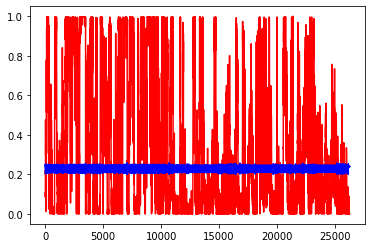

outs:torch.Size([219, 120, 3])
tensor(0.3215, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


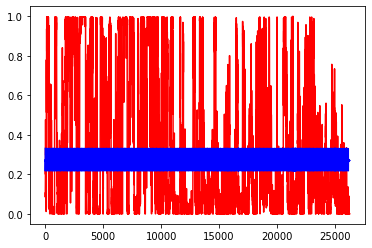

outs:torch.Size([219, 120, 3])
tensor(0.2650, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


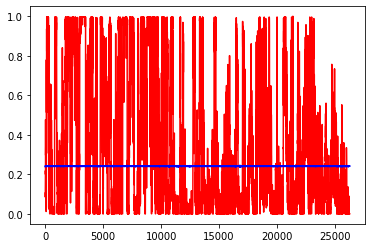

outs:torch.Size([219, 120, 3])
tensor(0.2204, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


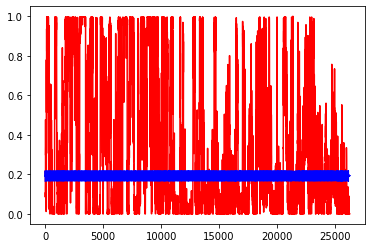

outs:torch.Size([219, 120, 3])
tensor(0.1937, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


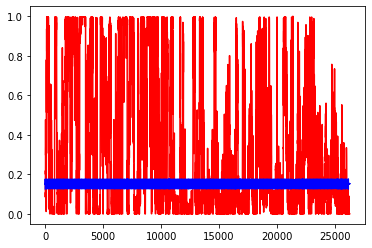

outs:torch.Size([219, 120, 3])
tensor(0.1768, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


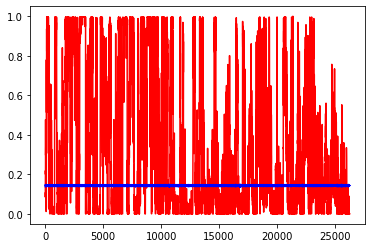

outs:torch.Size([219, 120, 3])
tensor(0.1607, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


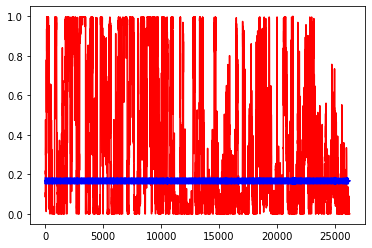

outs:torch.Size([219, 120, 3])
tensor(0.1463, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


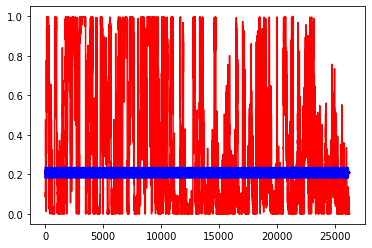

outs:torch.Size([219, 120, 3])
tensor(0.1373, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


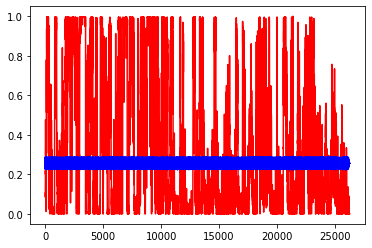

outs:torch.Size([219, 120, 3])
tensor(0.1326, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


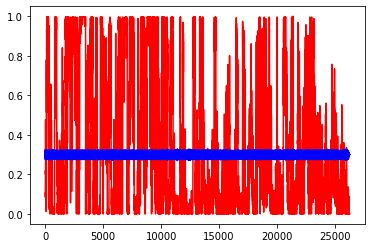

outs:torch.Size([219, 120, 3])
tensor(0.1311, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


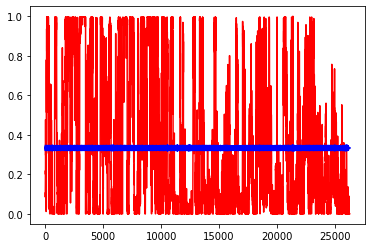

outs:torch.Size([219, 120, 3])
tensor(0.1311, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


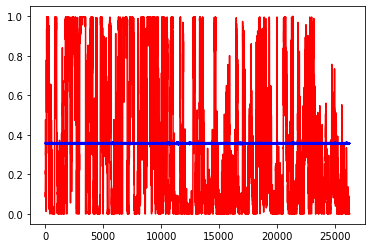

outs:torch.Size([219, 120, 3])
tensor(0.1323, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


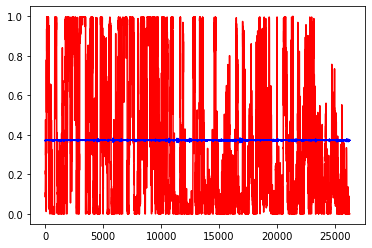

outs:torch.Size([219, 120, 3])
tensor(0.1348, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


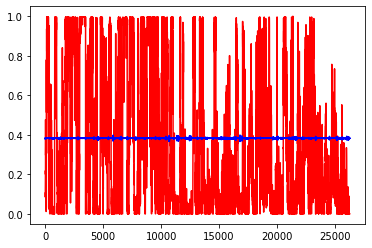

outs:torch.Size([219, 120, 3])
tensor(0.1377, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


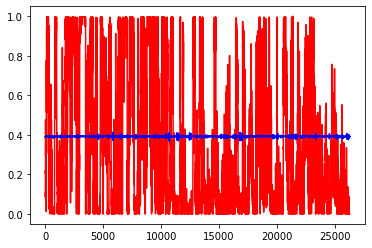

outs:torch.Size([219, 120, 3])
tensor(0.1394, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


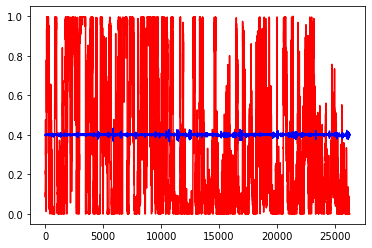

outs:torch.Size([219, 120, 3])
tensor(0.1395, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


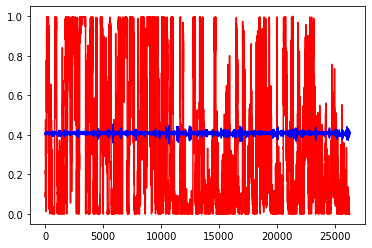

outs:torch.Size([219, 120, 3])
tensor(0.1386, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


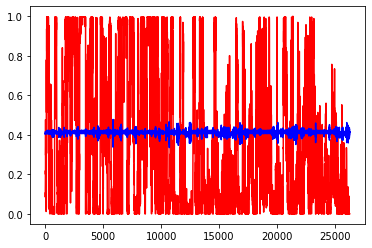

outs:torch.Size([219, 120, 3])
tensor(0.1374, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


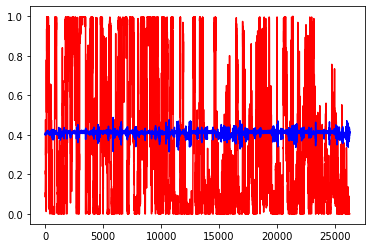

outs:torch.Size([219, 120, 3])
tensor(0.1361, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


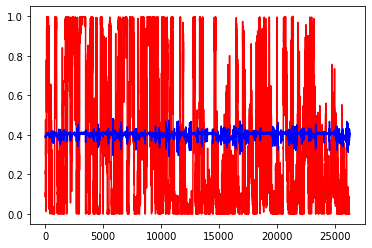

outs:torch.Size([219, 120, 3])
tensor(0.1345, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


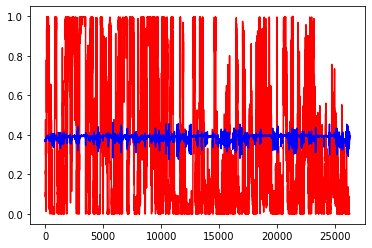

outs:torch.Size([219, 120, 3])
tensor(0.1330, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


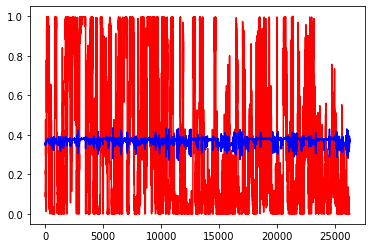

outs:torch.Size([219, 120, 3])
tensor(0.1315, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


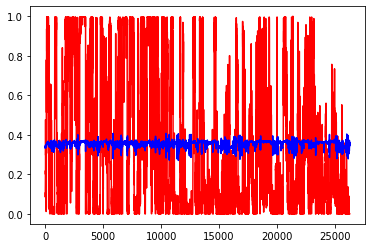

outs:torch.Size([219, 120, 3])
tensor(0.1300, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


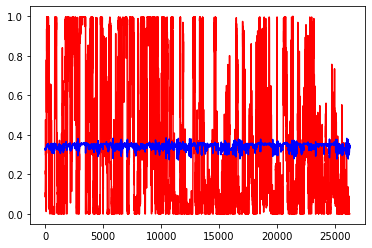

outs:torch.Size([219, 120, 3])
tensor(0.1287, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


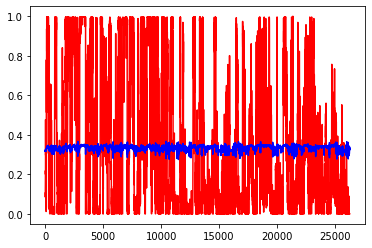

outs:torch.Size([219, 120, 3])
tensor(0.1277, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


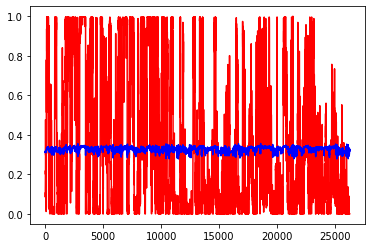

outs:torch.Size([219, 120, 3])
tensor(0.1270, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


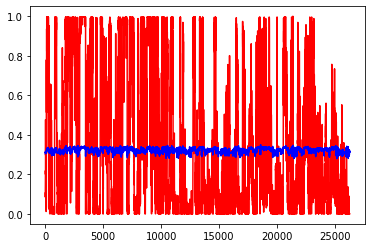

outs:torch.Size([219, 120, 3])
tensor(0.1265, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


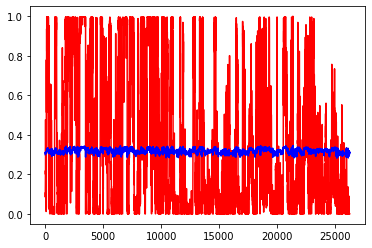

outs:torch.Size([219, 120, 3])
tensor(0.1261, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


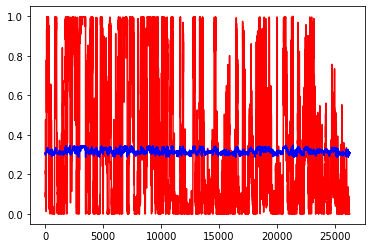

outs:torch.Size([219, 120, 3])
tensor(0.1253, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


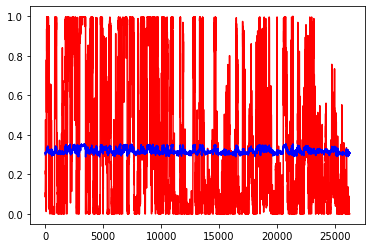

outs:torch.Size([219, 120, 3])
tensor(0.1236, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


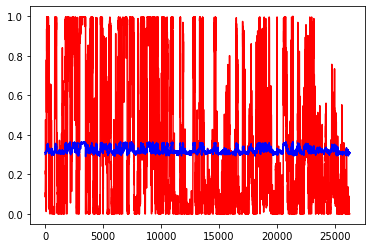

outs:torch.Size([219, 120, 3])
tensor(0.1205, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


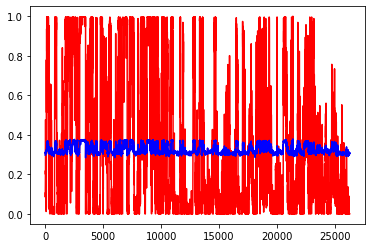

outs:torch.Size([219, 120, 3])
tensor(0.1163, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


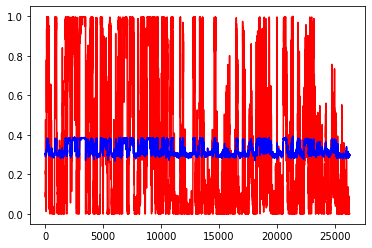

outs:torch.Size([219, 120, 3])
tensor(0.1118, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


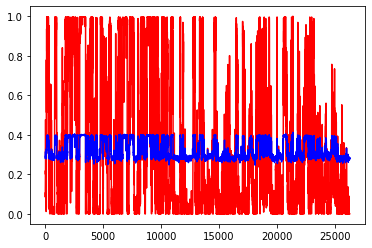

outs:torch.Size([219, 120, 3])
tensor(0.1070, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


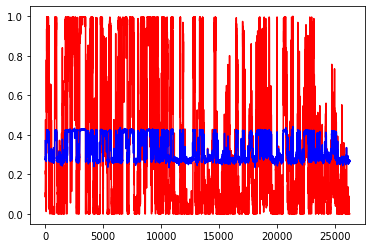

outs:torch.Size([219, 120, 3])
tensor(0.1012, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


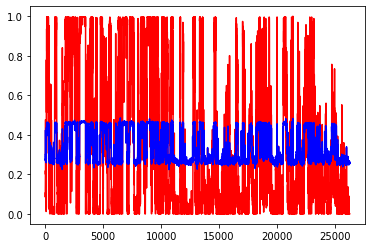

outs:torch.Size([219, 120, 3])
tensor(0.0941, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


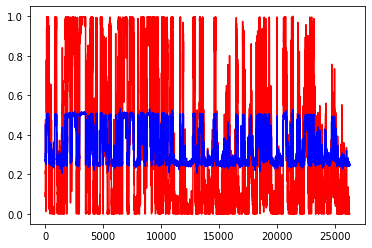

outs:torch.Size([219, 120, 3])
tensor(0.0872, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


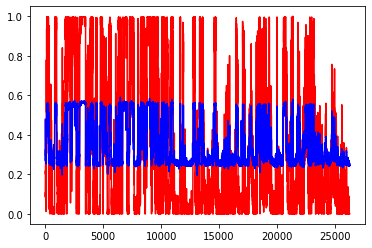

outs:torch.Size([219, 120, 3])
tensor(0.0815, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


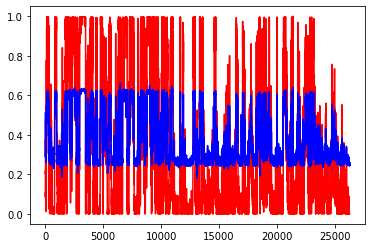

outs:torch.Size([219, 120, 3])
tensor(0.0766, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


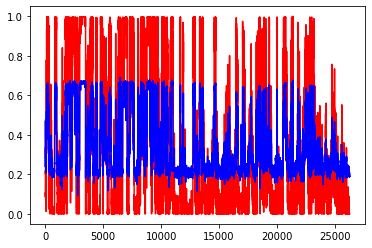

outs:torch.Size([219, 120, 3])
tensor(0.0725, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


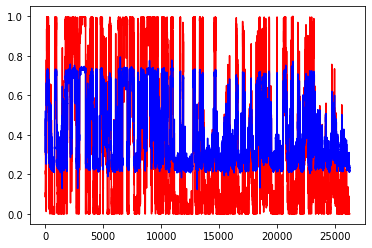

outs:torch.Size([219, 120, 3])
tensor(0.0640, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


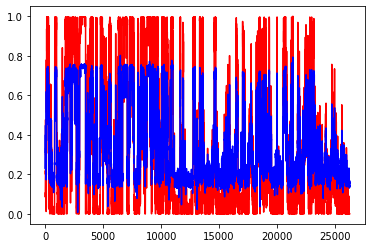

outs:torch.Size([219, 120, 3])
tensor(0.0575, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


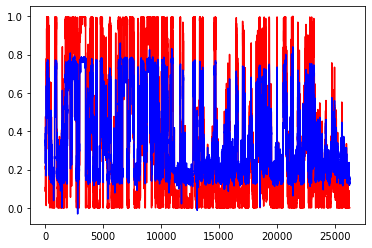

outs:torch.Size([219, 120, 3])
tensor(0.0542, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


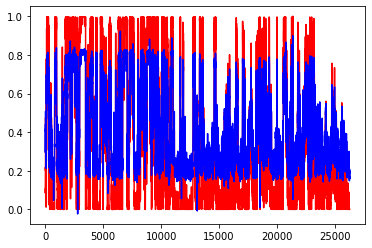

outs:torch.Size([219, 120, 3])
tensor(0.0470, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


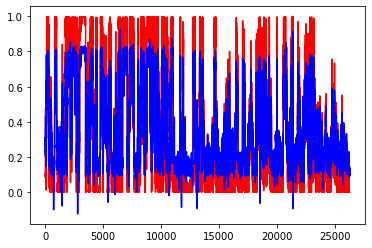

outs:torch.Size([219, 120, 3])
tensor(0.0427, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


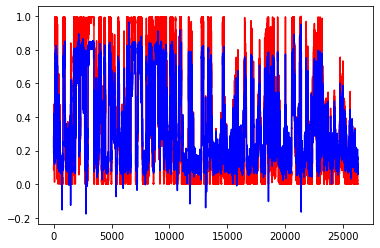

outs:torch.Size([219, 120, 3])
tensor(0.0390, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


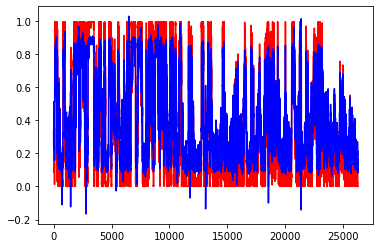

outs:torch.Size([219, 120, 3])
tensor(0.0330, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


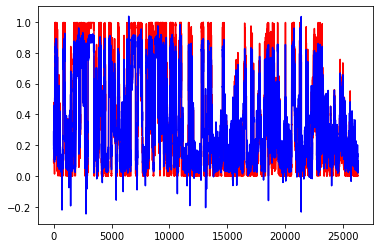

outs:torch.Size([219, 120, 3])
tensor(0.0303, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


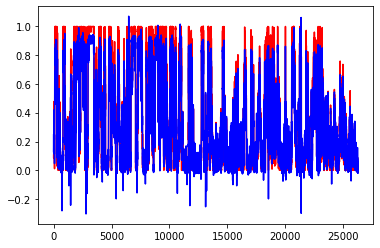

outs:torch.Size([219, 120, 3])
tensor(0.0273, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


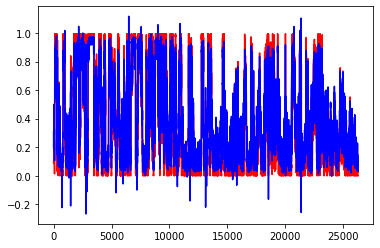

outs:torch.Size([219, 120, 3])
tensor(0.0222, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


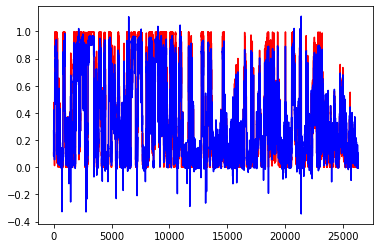

outs:torch.Size([219, 120, 3])
tensor(0.0202, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


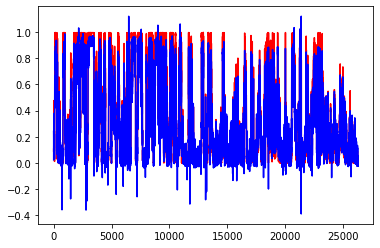

outs:torch.Size([219, 120, 3])
tensor(0.0178, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


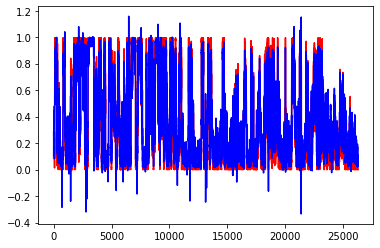

outs:torch.Size([219, 120, 3])
tensor(0.0143, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


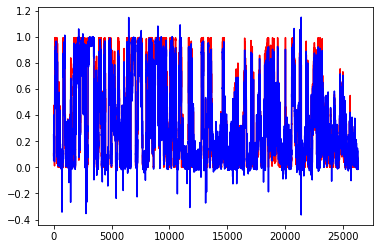

outs:torch.Size([219, 120, 3])
tensor(0.0134, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


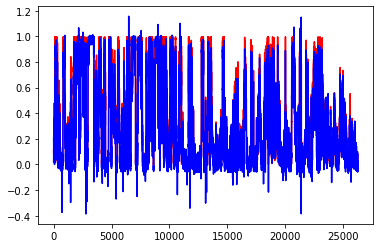

outs:torch.Size([219, 120, 3])
tensor(0.0114, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


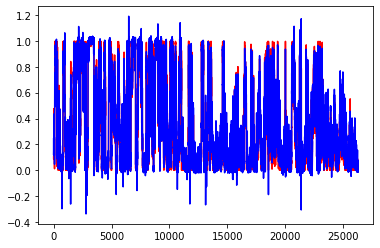

outs:torch.Size([219, 120, 3])
tensor(0.0090, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


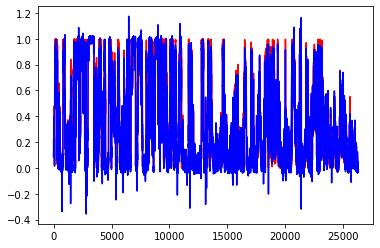

outs:torch.Size([219, 120, 3])
tensor(0.0084, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


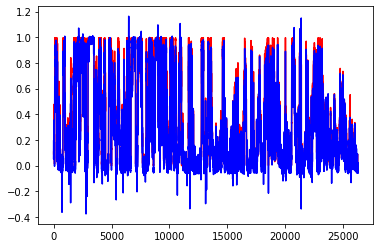

outs:torch.Size([219, 120, 3])
tensor(0.0068, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


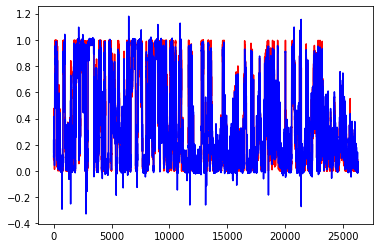

outs:torch.Size([219, 120, 3])
tensor(0.0054, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


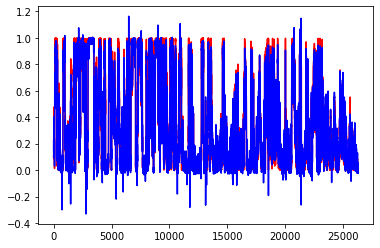

outs:torch.Size([219, 120, 3])
tensor(0.0050, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


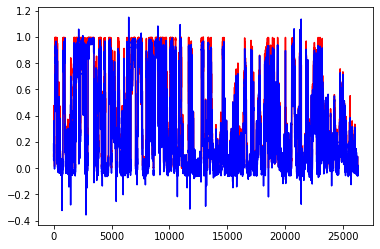

outs:torch.Size([219, 120, 3])
tensor(0.0038, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


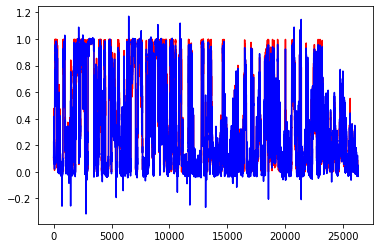

outs:torch.Size([219, 120, 3])
tensor(0.0033, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


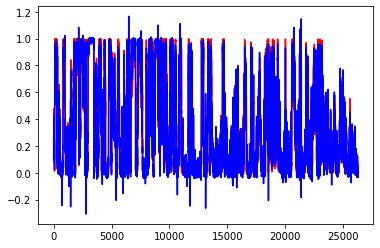

outs:torch.Size([219, 120, 3])
tensor(0.0031, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


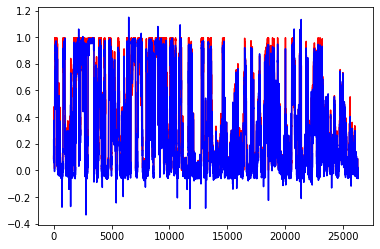

outs:torch.Size([219, 120, 3])
tensor(0.0023, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


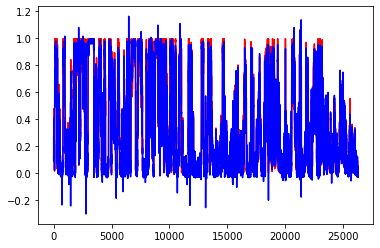

outs:torch.Size([219, 120, 3])
tensor(0.0023, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


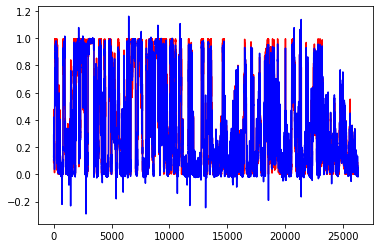

outs:torch.Size([219, 120, 3])
tensor(0.0021, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


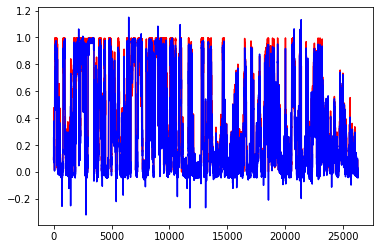

outs:torch.Size([219, 120, 3])
tensor(0.0017, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


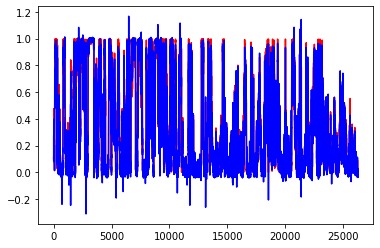

outs:torch.Size([219, 120, 3])
tensor(0.0019, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


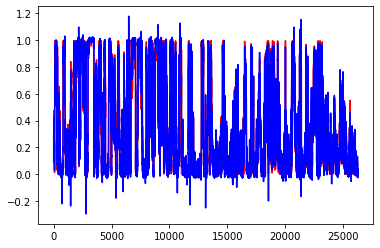

outs:torch.Size([219, 120, 3])
tensor(0.0018, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


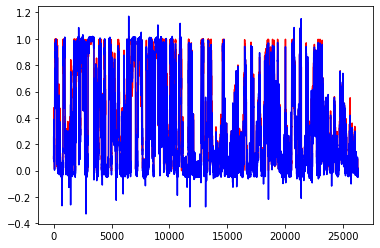

outs:torch.Size([219, 120, 3])
tensor(0.0016, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


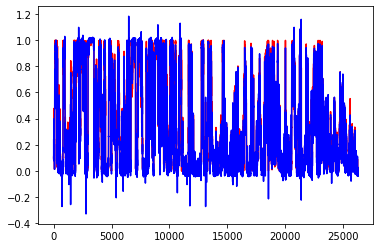

outs:torch.Size([219, 120, 3])
tensor(0.0018, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


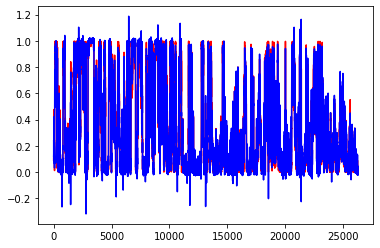

outs:torch.Size([219, 120, 3])
tensor(0.0017, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


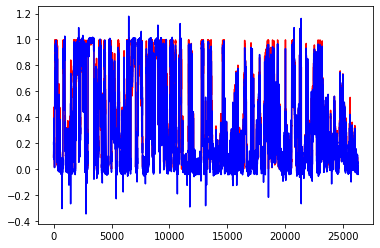

outs:torch.Size([219, 120, 3])
tensor(0.0017, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


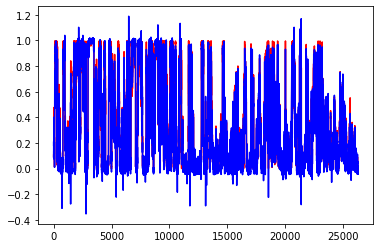

outs:torch.Size([219, 120, 3])
tensor(0.0019, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


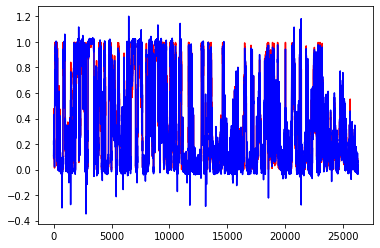

outs:torch.Size([219, 120, 3])
tensor(0.0018, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


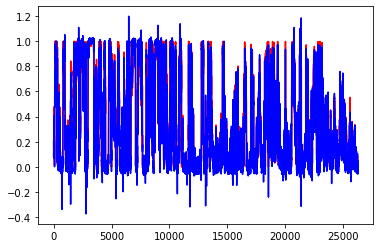

outs:torch.Size([219, 120, 3])
tensor(0.0018, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


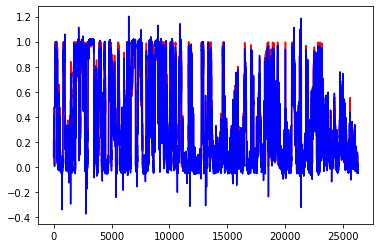

outs:torch.Size([219, 120, 3])
tensor(0.0020, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


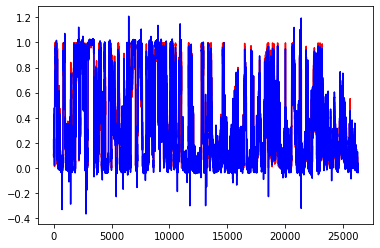

outs:torch.Size([219, 120, 3])
tensor(0.0019, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


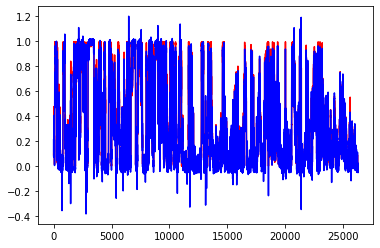

outs:torch.Size([219, 120, 3])
tensor(0.0019, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([219, 120, 1])) that is different to the input size (torch.Size([219, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


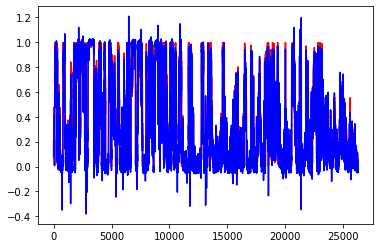

In [22]:
rnn = RNN(INPUT_SIZE, best_params['H_SIZE'], best_params['L_SIZE'])
optimizer = torch.optim.Adam(rnn.parameters(), lr=best_params['LR'])
criterion = nn.MSELoss()
h_state = torch.zeros(best_params['L_SIZE'],BATCH_SIZE,128)
EPOCHS = best_params['EPOCHS']
#训练
i = 0
h_state = None
for step in range(EPOCHS):
    i = i + 1
    rnn = rnn.double()
    prediction, h_state = rnn(x_train, h_state)
    h_state = h_state.data
    loss = criterion(prediction, y_train)
    print(loss)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    num = list(range(n_train))
    prediction_ = torch.mean(prediction, dim=2, keepdim=True)
    plt.plot(num, np.array(y_train).flatten().tolist(),'r-')
    plt.plot(num, prediction_.data.numpy().flatten().tolist(),'b-')
    plt.draw()
    plt.pause(0.02)

outs:torch.Size([146, 120, 3])
tensor(0.0024, dtype=torch.float64, grad_fn=<MseLossBackward0>)


G:\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([146, 120, 1])) that is different to the input size (torch.Size([146, 120, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


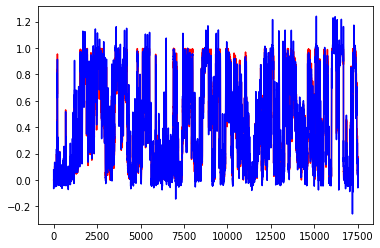

In [23]:
#测试
h_state = None
prediction, h_state = rnn(x_test, h_state)
prediction_ = torch.mean(prediction, dim=2, keepdim=True)
y1 = np.array(y_test).flatten().tolist()
y2 = prediction_.data.numpy().flatten()
loss = criterion(prediction, y_test)
print(loss)
num = list(range(n_test))
plt.plot(num, y1, 'r-')
plt.plot(num, y2, 'b-')
plt.draw()
plt.pause(0.02)
plt.ioff()
plt.show()

对Active Power做ADF单位根检验

In [24]:
import numpy as np
import statsmodels.api as sm

result = sm.tsa.stattools.adfuller(subdf.values[:,[0]])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -14.709519325540905
p-value: 2.8621155219945937e-27
Critical Values:
   1%: -3.4304993385253177
   5%: -2.8616060043549454
   10%: -2.5668051319710807
